# Data Preprocessing

In [6]:
!pip show unittest

# 
- First glimpses to data to find missing and inconsistent values, transformations etc.

In [31]:

def load_data_from_internet_with_gzip(gzip_file_url):
    
        # Extract all files from the gzip
    response = requests.get(gzip_file_url)
    
    
    if response.status_code == 200:
    # Create a file-like object from the gz file content
        gzip_file_content = io.BytesIO(response.content)

        with gzip.open(gzip_file_content, 'rt') as f:
            # Get the list of file names in the gzip archive

                df = pd.read_csv(f)
    else:
        print(f"Failed to fetch the gzip file. Status code: {response.status_code}")            

    return df

In [42]:
depression_df=load_data_from_internet_with_gzip('https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/hlth_ehis_mh1i/1.0/*.*.*.*.*.*.*?c[freq]=A&c[unit]=PC&c[hlth_pb]=DPR,DPR_MJR,DPR_OTH&c[quant_inc]=QU1,QU2,QU4,QU5,QU3&c[sex]=M,F&c[age]=Y15-19,Y15-24,Y15-29,Y15-64,Y18-24,Y18-44,Y18-64,Y20-24,Y25-29,Y25-34,Y25-64,Y35-44,Y45-54,Y45-64,Y55-64,Y65-74&c[geo]=EU27_2020,EU28,BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,RS,TR&compress=true&format=csvdata&formatVersion=2.0&c[TIME_PERIOD]=2019,2014')


In [43]:
depression_df

,STRUCTURE,STRUCTURE_ID,freq,unit,hlth_pb,quant_inc,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR,QU1,F,Y15-19,AT,2014,9.0,NaN
1,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR,QU1,F,Y15-19,BG,2014,5.0,u
2,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR,QU1,F,Y15-19,CY,2014,2.2,u
3,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR,QU1,F,Y15-19,CZ,2014,2.1,u
4,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR,QU1,F,Y15-19,DE,2014,17.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22435,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR_OTH,QU5,M,Y65-74,SK,2014,0.0,u
22436,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR_OTH,QU5,M,Y65-74,SK,2019,0.0,NaN
22437,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR_OTH,QU5,M,Y65-74,TR,2014,0.0,NaN
22438,dataflow,ESTAT:HLTH_EHIS_MH1I(1.0),A,PC,DPR_OTH,QU5,M,Y65-74,TR,2019,1.8,NaN


In [34]:
#eliminating countries which dont have both year data 2014,2019
dict_dep=depression_df.groupby("geo").TIME_PERIOD.unique().to_dict()
drop_countries=[]
for k,i in dict_dep.items():
    if len(i)!=2:
        print(k,i)
        drop_countries.append(k)

depression_df.drop(depression_df[depression_df["geo"].isin(drop_countries)].index,inplace=True)


In [44]:
dict_dep=depression_df.groupby("geo").TIME_PERIOD.unique().to_dict()
drop_countries=[]
for k,i in dict_dep.items():
    if len(i)!=2:
        #print(k,i)
        drop_countries.append(k)
drop_countries

['BE', 'EU28', 'NL', 'RS', 'UK']

In [38]:
drop_ages=['Y15-29','Y18-24','Y18-44','Y18-64','Y15-19','Y20-24','Y25-29','Y25-64']

In [39]:
drop_ages=['Y15-29','Y18-24','Y18-44','Y18-64','Y15-19','Y20-24','Y25-29','Y25-64']
depression_df.drop(depression_df[depression_df["age"].isin(drop_ages)].index,inplace=True)


In [40]:
depression_df.age.value_counts()

Y15-24    1740
Y15-64    1740
Y25-34    1740
Y35-44    1740
Y45-54    1740
Y45-64    1740
Y55-64    1740
Y65-74    1740
Name: age, dtype: int64

In [6]:
depression_df.drop(df[df["depression_level"]=="DPR"].index,inplace=True)

In [10]:
depression_df["income_quantile"].map({'QU1':'Poor', 'QU2':'Low', 'QU3':'Average', 'QU4':'Comfortable', 'QU5':'Rich'})

80       Poor
81       Poor
82       Poor
83       Poor
84       Poor
         ... 
13915    Rich
13916    Rich
13917    Rich
13918    Rich
13919    Rich
Name: income_quantile, Length: 9280, dtype: object

- Depression dataset first glances done. Next step is doing the same thing for purchase power dataset.

In [59]:
purchase_power_df=load_data_from_internet_with_gzip('https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/sdg_10_10/1.0/*.*.*.*.*?c[freq]=A&c[na_item]=EXP_PPS_EU27_2020_HAB&c[ppp_cat]=GDP&c[unit]=PC&c[geo]=EU27_2020,EU28,EU27_2007,EA20,EA19,BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,CH,UK,BA,ME,MK,AL,RS,TR,US,JP&compress=true&format=csvdata&formatVersion=2.0&c[TIME_PERIOD]=2019,2014')


In [60]:
purchase_power_df

,STRUCTURE,STRUCTURE_ID,freq,na_item,ppp_cat,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,AL,2014,8100,NaN
1,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,AL,2019,9500,NaN
2,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,AT,2014,35000,NaN
3,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,AT,2019,39400,NaN
4,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,BA,2014,8100,NaN
...,...,...,...,...,...,...,...,...,...,...
83,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,TR,2019,18500,NaN
84,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,UK,2014,29600,NaN
85,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,UK,2019,32500,NaN
86,dataflow,ESTAT:SDG_10_10(1.0),A,EXP_PPS_EU27_2020_HAB,GDP,PC,US,2014,39400,NaN


In [64]:
dict_pp=purchase_power_df.groupby("geo").TIME_PERIOD.unique().to_dict()

In [65]:
#eliminating countries which dont have both year data 2014,2019
drop_countries=[]
for k,i in dict_pp.items():
    if len(i)!=2:
        print(k,i)
        drop_countries.append(k)

drop_countries

[]

- Data preprocessing phase done. These findings will be used in data pipeline. Next step is doing further analysis to data to discover patterns, correlations etc. 

# Draft Analysis for final_report

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine


In [2]:
con = create_engine('sqlite:///../data/economic_depression.sqlite')
df = pd.read_sql_table('economic_depression', con)

In [4]:
df.columns

Index(['country', 'year', 'purchase_power', 'depression_level',
       'income_quantile', 'sex', 'age', 'depression_percentage'],
      dtype='object')

- Below I tried to figure out how to create visualization on world map. however I could not make it. 

# geomap

In [24]:
keys=df.country.unique()
three_letter_codes=['AUT', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'EST', 'GRC', 'ESP', 'EU27_2020', 'FIN', 'FRA', 'HRV', 'HUN', 'IRL', 'ISL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NOR', 'POL', 'PRT', 'ROU', 'SWE', 'SVN', 'SVK', 'TUR']
my_dict = dict(zip(keys, three_letter_codes))
df["country_shortname2"]=df.country.map(my_dict)

In [28]:
df

,country,year,purchase_power,depression_level,income_quantile,sex,age,depression_percentage,country_shortname2
0,AT,2014,35000,DPR_MJR,Poor,F,Y15-24,0.6,AUT
1,AT,2014,35000,DPR_MJR,Poor,F,Y15-64,2.2,AUT
2,AT,2014,35000,DPR_MJR,Poor,F,Y25-34,1.9,AUT
3,AT,2014,35000,DPR_MJR,Poor,F,Y35-44,2.4,AUT
4,AT,2014,35000,DPR_MJR,Poor,F,Y45-54,4.6,AUT
...,...,...,...,...,...,...,...,...,...
9275,TR,2019,18500,DPR_OTH,Rich,M,Y35-44,2.0,TUR
9276,TR,2019,18500,DPR_OTH,Rich,M,Y45-54,2.5,TUR
9277,TR,2019,18500,DPR_OTH,Rich,M,Y45-64,2.3,TUR
9278,TR,2019,18500,DPR_OTH,Rich,M,Y55-64,2.1,TUR


In [38]:
!pip install geopandas --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.3.1 requires click<8.0,>=7.0, but you have click 8.1.7 which is incompatible.
You should consider upgrading via the 'C:\Users\Ramiscan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached geopandas-0.14.1-py3-none-any.whl (1.1 MB)
  Using cached fiona-1.9.5-cp310-cp310-win_amd64.whl (22.9 MB)
  Using cached pyproj-3.6.1-cp310-cp310-win_amd64.whl (6.1 MB)
  Using cached pandas-2.1.4-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached shapely-2.0.2-cp310-cp310-win_amd64.whl (1.4 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [39]:
import geopandas as gpd  

In [40]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\Ramiscan\AppData\Local\Temp/ipykernel_18980/1771207407.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [45]:
df

,country,year,purchase_power,depression_level,income_quantile,sex,age,depression_percentage,country_shortname2
0,AT,2014,35000,DPR_MJR,Poor,F,Y15-24,0.6,AUT
1,AT,2014,35000,DPR_MJR,Poor,F,Y15-64,2.2,AUT
2,AT,2014,35000,DPR_MJR,Poor,F,Y25-34,1.9,AUT
3,AT,2014,35000,DPR_MJR,Poor,F,Y35-44,2.4,AUT
4,AT,2014,35000,DPR_MJR,Poor,F,Y45-54,4.6,AUT
...,...,...,...,...,...,...,...,...,...
9275,TR,2019,18500,DPR_OTH,Rich,M,Y35-44,2.0,TUR
9276,TR,2019,18500,DPR_OTH,Rich,M,Y45-54,2.5,TUR
9277,TR,2019,18500,DPR_OTH,Rich,M,Y45-64,2.3,TUR
9278,TR,2019,18500,DPR_OTH,Rich,M,Y55-64,2.1,TUR


In [53]:
country_depressions=df.groupby('country').depression_percentage.mean().reset_index()

In [55]:
country_depressions["country_shortname2"]=country_depressions.country.map(my_dict)

In [56]:
country_depressions

,country,depression_percentage,country_shortname2
0,AT,2.536875,AUT
1,BG,2.634375,BGR
2,CY,1.715000,CYP
3,CZ,1.733750,CZE
4,DE,4.617188,DEU
5,DK,3.742089,DNK
6,EE,3.298428,EST
7,EL,1.518471,GRC
8,ES,2.737188,ESP
9,EU27_2020,3.220938,EU27_2020


In [ ]:
import plotly.express as px
fig = px.choropleth(country_depressions, locations="country_shortname2",
                    color="depression_percentage",
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# geomap done

In [5]:
df[df["country"]=="DE"]

,country,year,purchase_power,depression_level,income_quantile,sex,age,depression_percentage
1280,DE,2014,33700,DPR_MJR,Poor,F,Y15-24,5.9
1281,DE,2014,33700,DPR_MJR,Poor,F,Y15-64,7.1
1282,DE,2014,33700,DPR_MJR,Poor,F,Y25-34,8.3
1283,DE,2014,33700,DPR_MJR,Poor,F,Y35-44,6.1
1284,DE,2014,33700,DPR_MJR,Poor,F,Y45-54,9.0
...,...,...,...,...,...,...,...,...
1595,DE,2019,37900,DPR_OTH,Rich,M,Y35-44,1.2
1596,DE,2019,37900,DPR_OTH,Rich,M,Y45-54,4.5
1597,DE,2019,37900,DPR_OTH,Rich,M,Y45-64,3.0
1598,DE,2019,37900,DPR_OTH,Rich,M,Y55-64,1.5


In [300]:
keys=df.country.unique()
keys

array(['AT', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR',
       'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NO', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK', 'TR'], dtype=object)

In [301]:
keys=df.country.unique()
country_labels = ['Austria', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
    'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Turkey']
label_dict = dict(zip(keys, country_labels))
df["country_label"]=df.country.map(label_dict)

In [302]:
avg_depression=df.groupby(["country","country_label"]).depression_percentage.mean().sort_values()

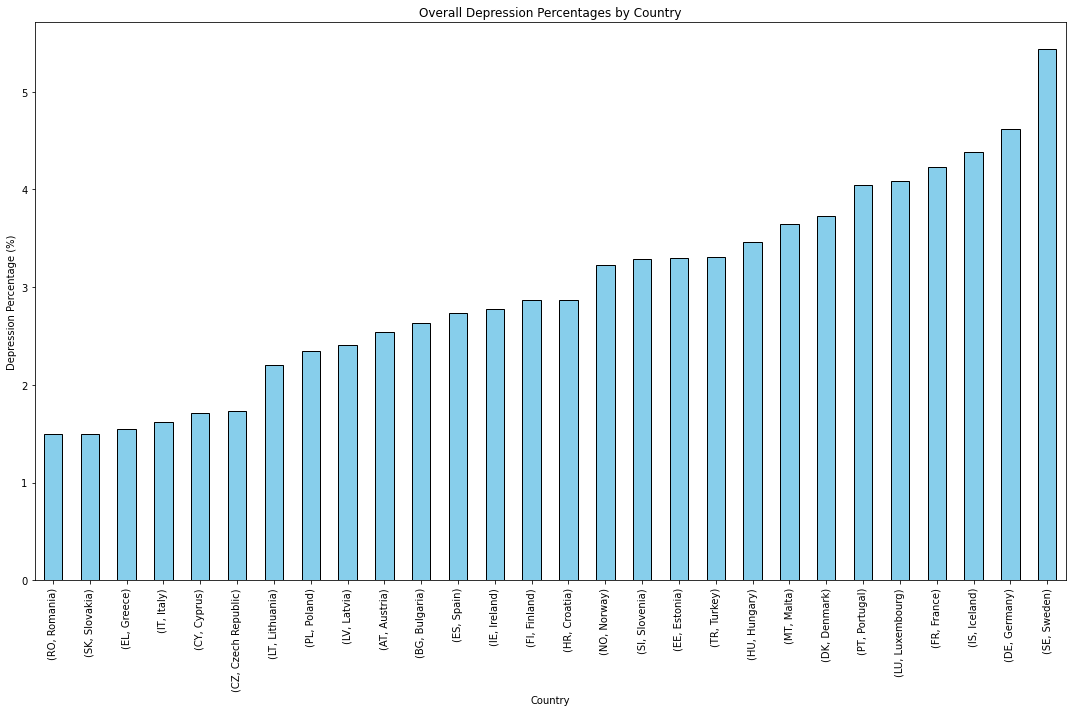

In [282]:
plt.figure(figsize=(15,10))
avg_depression.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Overall Depression Percentages by Country')
plt.xlabel('Country')
plt.ylabel('Depression Percentage (%)')
plt.tight_layout()

# Display the plot
plt.show();


In [283]:
depression_2014=df[df["year"]==2014].groupby(["country","country_label"]).depression_percentage.mean().sort_values().reset_index()
depression_2019=df[df["year"]==2019].groupby(["country","country_label"]).depression_percentage.mean().sort_values().reset_index()

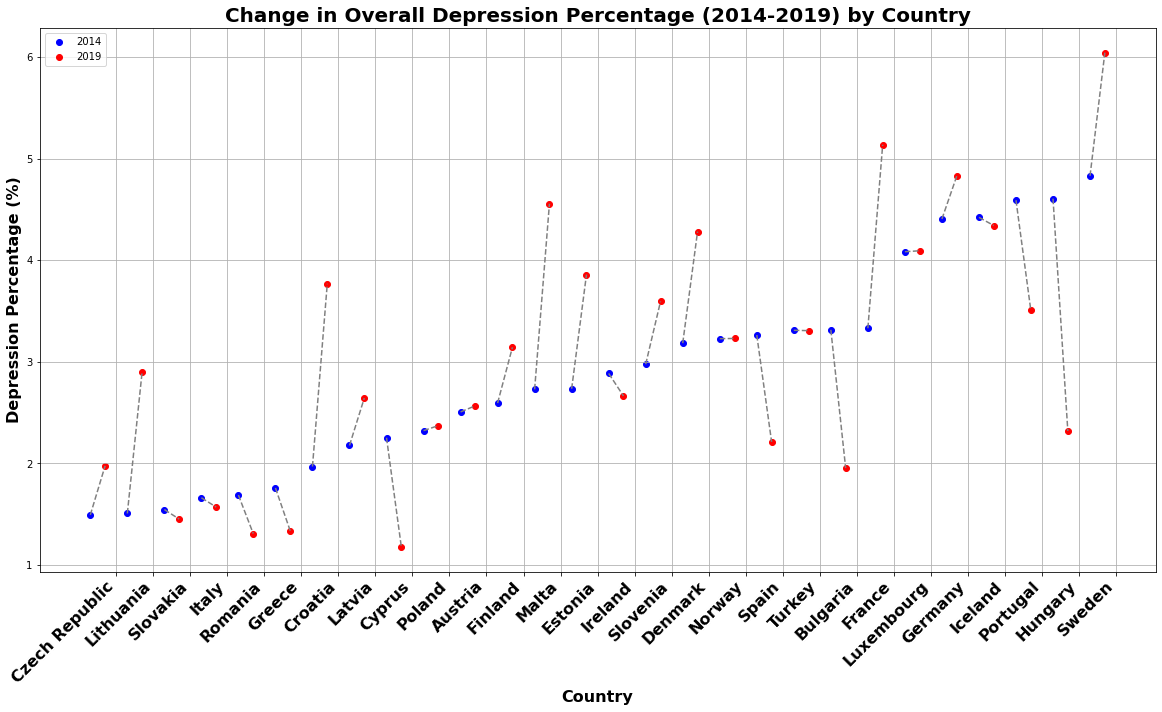

In [284]:
plt.figure(figsize=(20,10))

merged_data = pd.merge(depression_2014, depression_2019, on='country', suffixes=('_2014', '_2019'))

x_offset = 0.2
plt.scatter(np.arange(len(merged_data['country'])) - x_offset, merged_data['depression_percentage_2014'],
            label='2014', color='blue', marker='o')

plt.scatter(np.arange(len(merged_data['country'])) + x_offset, merged_data['depression_percentage_2019'],
            label='2019', color='red', marker='o')

for i in range(len(merged_data)):
    plt.plot([np.arange(len(merged_data['country']))[i] - x_offset, np.arange(len(merged_data['country']))[i] + x_offset],
             [merged_data['depression_percentage_2014'][i], merged_data['depression_percentage_2019'][i]],
             linestyle='--', color='gray')

plt.title('Change in Overall Depression Percentage (2014-2019) by Country', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, fontweight='bold')
plt.ylabel('Depression Percentage (%)', fontsize=16, fontweight='bold')
plt.xticks(range(len(merged_data)), merged_data['country_label_2014'], rotation=45, ha='right', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.gca().xaxis.set_ticks([i + 0.5 for i in range(len(merged_data))]) 
plt.gca().set_xticklabels(merged_data['country_label_2014']) 
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


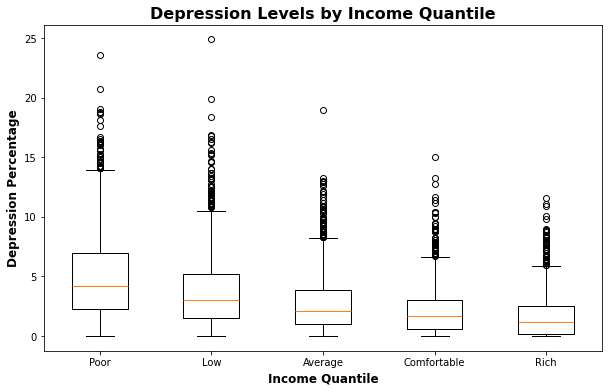

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['income_quantile'] == 'Poor']['depression_percentage'],
             df[df['income_quantile'] == 'Low']['depression_percentage'],
             df[df['income_quantile'] == 'Average']['depression_percentage'],
             df[df['income_quantile'] == 'Comfortable']['depression_percentage'],
            df[df['income_quantile'] == 'Rich']['depression_percentage']],
            labels=['Poor', 'Low', 'Average', 'Comfortable', 'Rich'])

# Customize the plot
plt.title('Depression Levels by Income Quantile', fontsize=16, fontweight='bold')
plt.xlabel('Income Quantile', fontsize=12, fontweight='bold')
plt.ylabel('Depression Percentage', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [309]:
df2=df.groupby(["year","country","country_label"])["depression_percentage","purchase_power"].mean().sort_values(by=["year","depression_percentage"]).reset_index()

C:\Users\Ramiscan\AppData\Local\Temp/ipykernel_18980/4017172069.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Pearson correlation coefficient: 0.3786608636347642


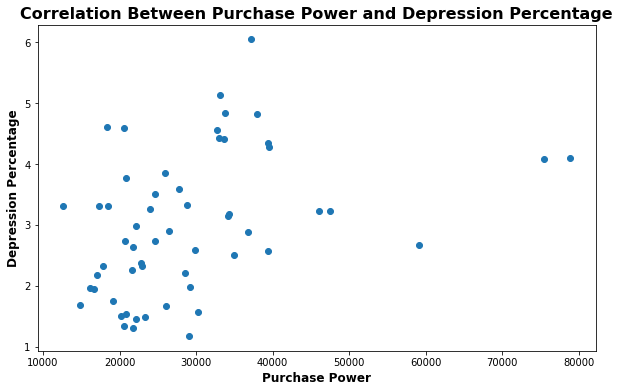

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df2['purchase_power'], df2['depression_percentage'])

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(df2['purchase_power'], df2['depression_percentage'])[0, 1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Customize the plot
plt.title('Correlation Between Purchase Power and Depression Percentage', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Power', fontsize=12, fontweight='bold')
plt.ylabel('Depression Percentage', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [8]:
df[(df["country"]=="AT") & (df["year"]==2014) & (df["income_quantile"]=="QU5")].sort_values(["sex","depression_level","age"])

,country,year,purchase_power,depression_level,income_quantile,sex,age,depression_percentage
144,AT,2014,35000,DPR_MJR,QU5,F,Y15-24,0.4
145,AT,2014,35000,DPR_MJR,QU5,F,Y15-64,0.7
146,AT,2014,35000,DPR_MJR,QU5,F,Y25-34,0.6
147,AT,2014,35000,DPR_MJR,QU5,F,Y35-44,1.1
148,AT,2014,35000,DPR_MJR,QU5,F,Y45-54,0.8
149,AT,2014,35000,DPR_MJR,QU5,F,Y45-64,0.6
150,AT,2014,35000,DPR_MJR,QU5,F,Y55-64,0.4
151,AT,2014,35000,DPR_MJR,QU5,F,Y65-74,0.0
224,AT,2014,35000,DPR_OTH,QU5,F,Y15-24,0.0
225,AT,2014,35000,DPR_OTH,QU5,F,Y15-64,2.1
